<a href="https://colab.research.google.com/github/unfortunate-code/Sign-Language-Classifier/blob/main/sign_language_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data
data_test=pd.read_csv("https://raw.githubusercontent.com/VinitaSilaparasetty/hand-gesture-recognition/main/sign_mnist_test.csv")
data_train=pd.read_csv("/content/drive/MyDrive/sign_mnist_train.csv")

In [ ]:
def show_img(img, df):
  label = data_test['label'][img]
  pixels = data_test.iloc[img, 1:]
  pixels = np.array(pixels, dtype='uint8')
  pixels = pixels.reshape((28, 28))

  plt.title('Label is {label}'.format(label=label))
  plt.imshow(pixels, cmap='gray')
  plt.show()

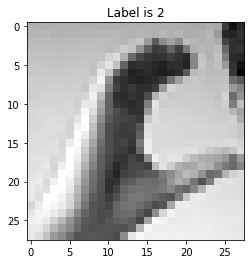

In [ ]:
show_img(20, data_test)

In [ ]:
y_train = data_train['label']
y_test = data_test['label']

del data_train['label']
del data_test['label']

In [ ]:
# Label Binarizer

label_binarizer = LabelBinarizer()

y_train = label_binarizer.fit_transform(y_train)

y_test = label_binarizer.fit_transform(y_test)

In [ ]:
x_train = data_train.values
x_test = data_test.values

In [ ]:
# normalization

x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# reshape

x_train = x_train.reshape(-1, 28, 28, 1)

x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
# data augmentation

data_generator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

data_generator.fit(x_train)

In [ ]:
# build model

model = Sequential()
model.add(Conv2D(75, (3,3), strides = 1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2,padding='same'))
model.add(Conv2D(50, (3,3), strides=1,padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(25, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=24,activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#set learning rate

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:
#train model
model.fit(data_generator.flow(x_train, y_train, batch_size=128), epochs=20, validation_data=(x_test,y_test), callbacks=[learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 26s 110ms/step - loss: 1.1398 - accuracy: 0.6397 - val_loss: 3.3187 - val_accuracy: 0.0920 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 13s 62ms/step - loss: 0.2215 - accuracy: 0.9256 - val_loss: 1.2021 - val_accuracy: 0.6023 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 14s 63ms/step - loss: 0.1048 - accuracy: 0.9650 - val_loss: 0.3650 - val_accuracy: 0.8869 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 13s 62ms/step - loss: 0.0733 - accuracy: 0.9756 - val_loss: 0.2371 - val_accuracy: 0.9262 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 14s 67ms/step - loss: 0.0519 - accuracy: 0.9830 - val_loss: 0.0341 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 13s 63ms/step - loss: 0.0439 - accuracy: 0.9853 - val_loss: 0.5379 - val_accuracy: 0.8426 - lr: 0.0010
Epoch 7/20
215/215 [==============================] - ETA

In [ ]:
model.evaluate(x_test, y_test)

225/225 [==============================] - 1s 5ms/step - loss: 0.0011 - accuracy: 1.0000


[0.0010705988388508558, 1.0]

In [ ]:
predict_x = model.predict(x_test)
predictions = np.argmax(predict_x, axis = 1)
for i in range(len(predictions)):
  if (predictions[i] >= 9):
    predictions[i] += 1
predictions[:5]

array([ 6,  5, 10,  0,  3])

In [ ]:
# save model
model.save('hand_gesture.h5')